<a href="https://colab.research.google.com/github/dimakpa/DL_Projects/blob/main/DL_handwriting_recognition_more_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучим нейронку распознавать рукописи

Подключаем библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Загружаем данные

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Стандартизация данных, делим на 255, то есть на их максимальное значение

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Нужно подготовить правильный формат выходных значений нейронной сети

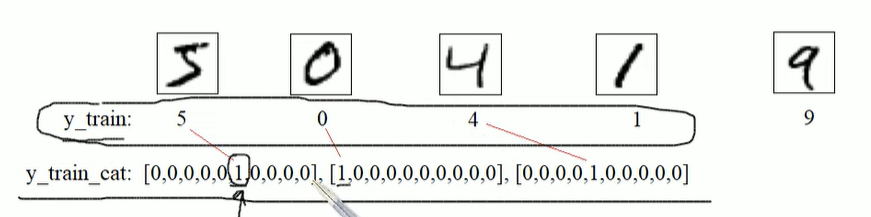

В керас уже есть преобразователь вектора 00010000 в число

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Посмотрм на данные

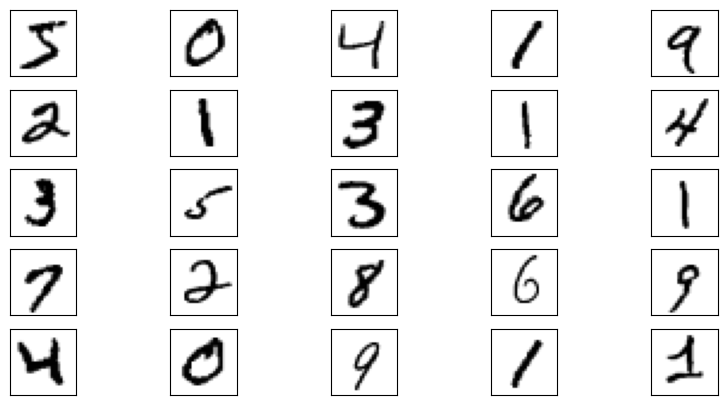

In [ ]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

В моедли оптимизации будем использовать категориальную кросс-энтропию, потому что в задачах классификации лучше использоавть именно этот критерий, а на выходе нейронов лучше использовать функцию softmax

При решении задач классификации, нам важен процент правильно распознанных значений, то есть чтоб процент ошибки был меньше. Минимизируя энтропию надеемся, что ошибка будет уменьшатся

Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


Запуск модели 80% - обучающая и 20% - тестовая

In [ ]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0996 - val_accuracy: 0.9728
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0312 - accuracy: 0.9910 - val_loss: 0.0901 - val_accuracy: 0.9737
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0245 - accuracy: 0.9927 - val_loss: 0.0922 - val_accuracy: 0.9747
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0978 - val_accuracy: 0.9726
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0929 - val_accuracy: 0.9761


Посмотрим, как модель справится с тестовой выборкой

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9774


[0.0818609744310379, 0.977400004863739]

Попробуем подать на вход любое изображение

1/1 [==============================] - 0s 23ms/step
[[1.70211112e-09 9.99990702e-01 2.99711651e-08 3.70200137e-09
  1.18827536e-07 8.69016747e-10 1.05082725e-08 4.64189634e-06
  4.54858991e-06 2.63155775e-10]]
Распознанная цифра: 1


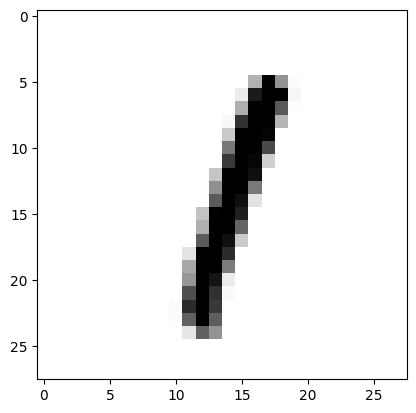

In [ ]:
n = 5
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( f"Распознанная цифра: {np.argmax(res)}" )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Выделим и посмотрим неправильные результаты. Прогоноим через модель всю выборку и найдем те, которые неправильно распознаны. Первые 20 предсказанные и 20 данные

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Только неверные

In [ ]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = pred[~mask]

print(x_false.shape)


[ True  True  True  True  True  True  True  True  True  True]
(226, 28, 28)


226 значений из 10000 распознаны неверно, выведем первые 5

Значение нейронки9


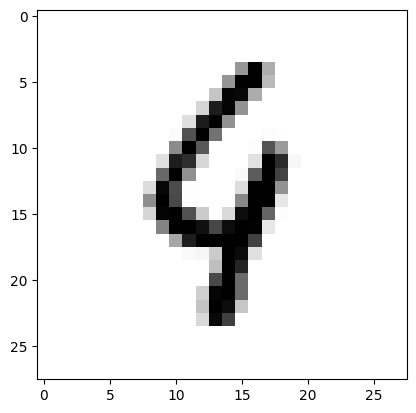

Значение нейронки9


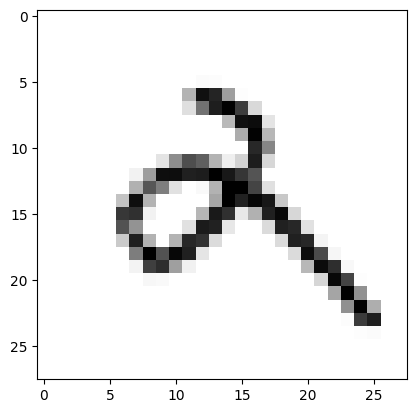

Значение нейронки6


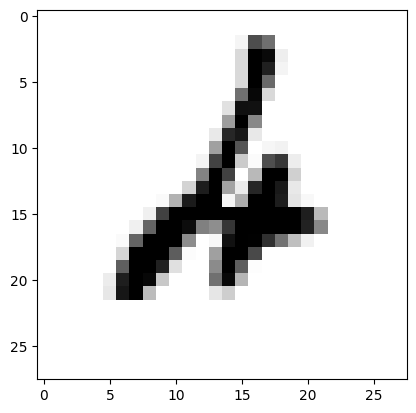

Значение нейронки8


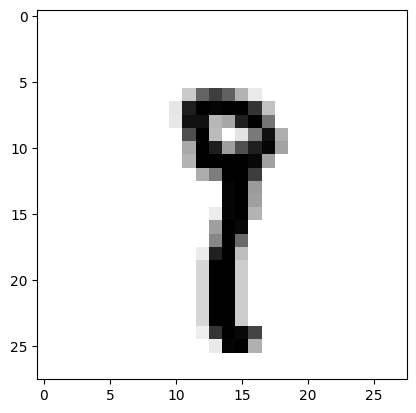

Значение нейронки3


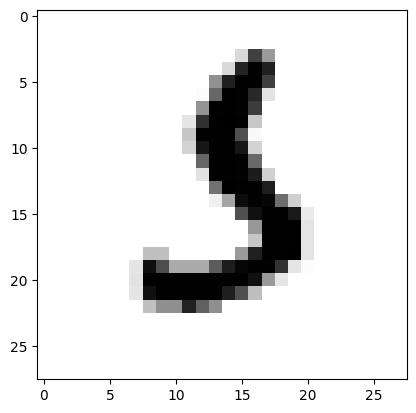

In [ ]:
for i in range(5):
  print("Значение нейронки" + str(y_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()

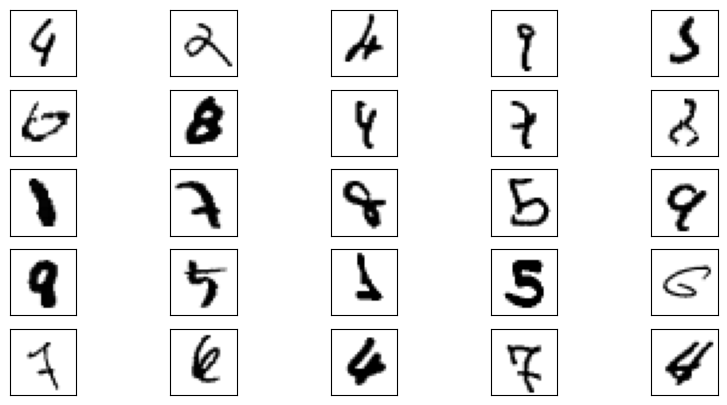

In [ ]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()

Попробуем сделать меньше ошибок добавлением количества нейронов

In [23]:
model_pro = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [24]:
model_pro.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
model_pro.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2703 - accuracy: 0.9226 - val_loss: 0.1233 - val_accuracy: 0.9665
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1203 - accuracy: 0.9643 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0821 - accuracy: 0.9755 - val_loss: 0.0876 - val_accuracy: 0.9745
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0743 - val_accuracy: 0.9785
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0748 - val_accuracy: 0.9798
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0773 - val_accuracy:

In [26]:
model_pro.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9781


[0.0808105394244194, 0.9781000018119812]

In [27]:
pred = model_pro.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [28]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = pred[~mask]

print(x_false.shape)


[ True  True  True  True  True  True  True  True False  True]
(219, 28, 28)


Значение нейронки6


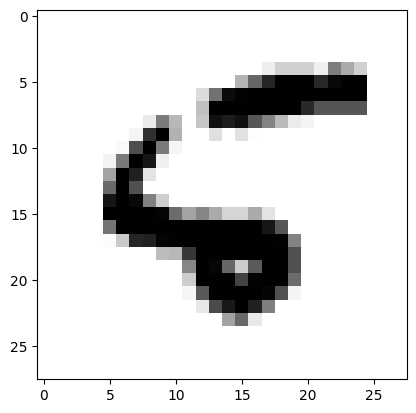

Значение нейронки2


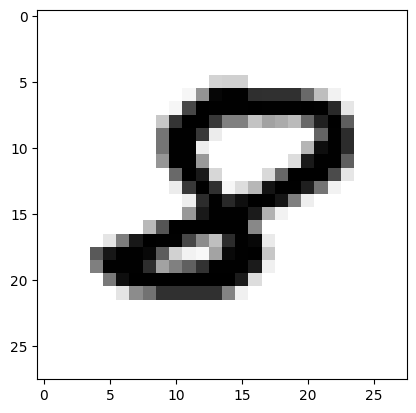

Значение нейронки2


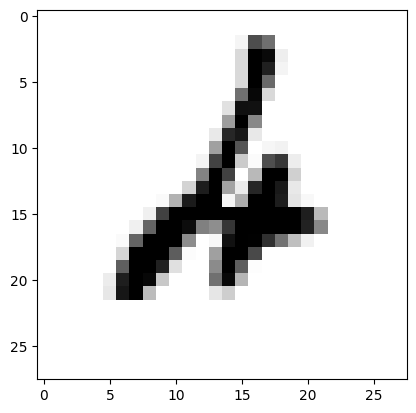

Значение нейронки7


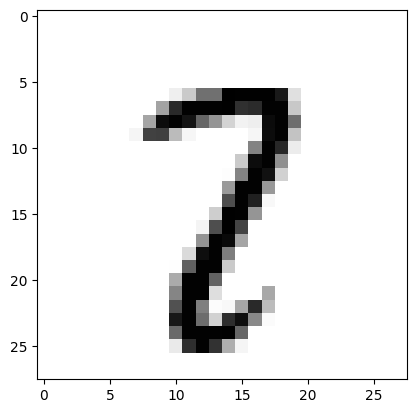

Значение нейронки3


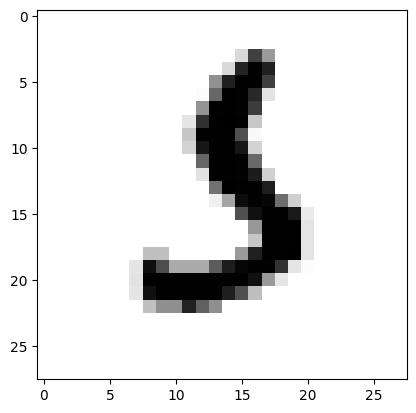

In [29]:
for i in range(5):
  print("Значение нейронки" + str(y_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()

Увеличение эпох помогло незначительно снизить ошибки...